## PHYS-467 Machine Learning for Physicists

## Week 2: Regression 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

import sklearn.preprocessing as preprocessing
from typing import Tuple

# Exercise 1: Linear Regression in 1D

**Question 1.1.a)** Write a function that creates one dimensional linear data and add a gaussian noise, i.e $y = a \cdot x + \varepsilon$ with $x,y,a,\varepsilon \in \mathbb R$ and $\varepsilon \sim \mathcal N(0,\sigma)$.

In [6]:
def generate_data(n_data: int, coefficient: float, variance: float) -> Tuple[np.ndarray, np.ndarray]:
    # The ":" is python's notion of typing, i.e. fixing what data types a function accept, and -> says what it will return.
    # We (sometimes) use this to help you understand what input types the function expects.
    # In this example we have
    # - an integer for the number of datapoints
    # - a floating point for the coefficient w
    # - a floating point number for the variance sigma
    #
    # Similarly it tells you what it expects you to return: A tuple of two numpy arrays
    # - the x's as a numpy array, of shape (n_data, 1)
    # - the y's as a numpy array, of shape (n_data)
    
    X = np.random.uniform(0, 1, (n_data, 1))
    
    y = coefficient * X.flatten() + np.random.normal(0, variance, n_data)
    
    return X, y

In [7]:
# here we generate some data 
coefficient = 3
variance = 1.5
n_data      = 30
X, y = generate_data(n_data, coefficient, variance)

# test that you ouput it in the correct shapes - if you get an error here don't continue, but make sure that you output the shape we expect you to
# in general applications in machine learning, the last dimension is usually the feature dimension
# since we have only one dimensional input, the number of features is 1 - but we still want to represent it in the larger dimensions, to be compatible with common libraries later on
assert X.shape == (n_data,1,), "Your X shape is incorrect, check that your function returns an array of size (n_data,1,)"
assert y.shape == (n_data,), "Your y shape is incorrect, check that your function returns an array of size (n_data,)"

**Question 1.1.b)** Generate and plot some data (X, Y), along with the noiseless function $y = a \cdot x$. Don't forget to label the axes and add a legend that shows that the scatterpoints are samples, and the line is the true function.

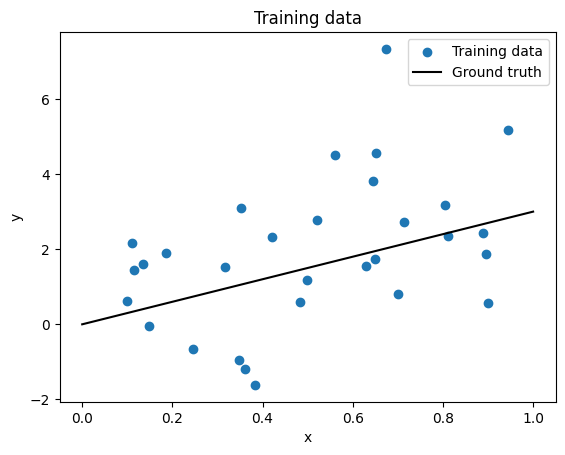

In [10]:
# plot the training data using matplotlib
plt.figure()
plt.scatter(X, y, label="Training data")

# label the axes
plt.xlabel("x")
plt.ylabel("y")

# plot the noiseless data (the ground truth)
x_ground = np.linspace(0, 1, 100)
y_ground = coefficient * x_ground
plt.plot(x_ground, y_ground, color="black", label="Ground truth")

# don't forget the legend
plt.legend()
plt.title("Training data")
plt.show()

**Question 1.2** Write a function to compute the least-square regression using the closed form you have seen in class.

This function should minimize the least squares loss for the parameterized function $\hat{y} = \hat{a} \cdot x$.
Note that you can use functions from `np.linalg` to invert matrices etc.

In [11]:
# Write a function to compute the linear-regression predictor in closed form
def linear_regression(X : np.ndarray, y : np.ndarray) -> np.ndarray:
    """
    arguments:
        - X : data matrix
        - y : output
    returns:
        - a : the least square estimator
    """

    return np.linalg.inv(X.T @ X) @ X.T @ y

In [12]:
# Print the predicted weights (coefficient + bias)
a_hat = linear_regression(X, y)
assert a_hat.shape == (1,), "You did not get a single value out to estimate a - this is wrong!"
print(f"We predicted a_hat={a_hat[0]} for the coefficient, while the ground truth is a={coefficient}.") # the notation with the f"I will print the {variable}." lets you easily print text.

We predicted a_hat=3.6440754416286074 for the coefficient, while the ground truth is a=3.


**Question 1.3** Plot your training set and the ground truth function again, but this time also plot the predicted function $\hat{y} = \hat{a}\cdot x$. Don't forget to add axes labels and a legend.

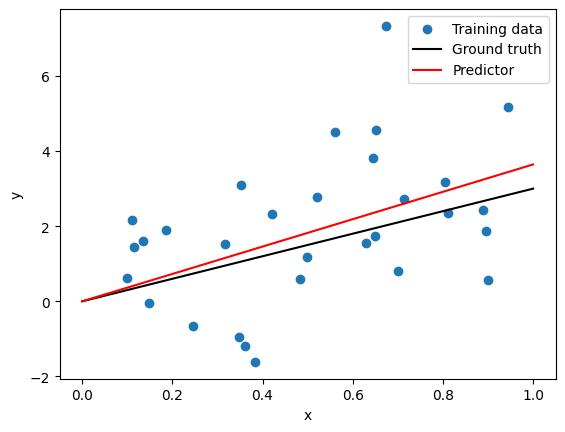

In [13]:
# Plot the training points and the predictor evaluated on a set of test points

plt.figure()
plt.scatter(X, y, label="Training data")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_ground, y_ground, color="black", label="Ground truth")
plt.plot(x_ground, a_hat * x_ground, color="red", label="Predictor")
plt.legend()

**Question 1.4** Now estimate $a$ with the `LinearRegression` object of the module [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Google how to use it correctly, and check that the coefficients from your direct implementation and the modules implementation are the same.

*Hint*: In the case here, we are **not** fitting the bias $b$ in the general linear regression of the form $y = ax+b$. What do you need to change when you call the sklearn function? Read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) carefully.

In [14]:
# Repeat with Scikit-learn
linear_regression_sk = LinearRegression(fit_intercept=False)

linear_regression_sk.fit(X, y)
y_pred_sk = linear_regression_sk.predict(x_ground.reshape(-1, 1))

print('sklearn : ', linear_regression_sk.coef_)
print('own implementation : ', a_hat)

sklearn :  [3.64407544]
own implementation :  [3.64407544]


# Exercise 2: Fitting physical data with Linear and Polynomial Regression

The superconductivity dataset [1] contains 81 chemical and molecular features extracted from >20,000 superconductors along with the critical temperature (the label) in the 82nd column. 
The goal is to predict the critical temperature $T_c$ based on the 81 first features. 
If you are interested by the physical meaning of those 81 features, check out the [original paper](https://arxiv.org/pdf/1803.10260.pdf)!

[1] Hamidieh, Computational Materials Science, 2018

First, you need to download the dataset, in .csv format. You can find it here : https://archive.ics.uci.edu/dataset/464/superconductivty+data or in the zip file/github repository.

Now, load the data into the notebook. Since the format is `.csv` (data table), we used the Python module called `pandas`. If you are locally running the notebook, you need to indicate the path to it, e.g. "Downloads/train.csv". 
On noto (the go-epfl link), you should see the train.csv already in your folder, so no need to download it.

In [74]:
import pandas as pd
dataset=pd.read_csv("train.csv",index_col=None) # todo: optionally change "train.csv" to the location of the file you downloaded yourself

using .values() converts the table into a numpy array . Since the last column is the label $T_c$, we have for the complete dataset our X's and y's are the following.

In [75]:
X = dataset.values[:,:-1]
y = dataset.values[:,-1]

**Question 2.1** Print the number of features and datapoints in the dataset. Verify that there are 81 features and get the exact number of datapoints.

In [76]:
n_samples = X.shape[0]
n_features = X.shape[1]
print(f"There are {n_features} features and {n_samples} dataspoints.")

There are 81 features and 21263 dataspoints.


**Question 2.2**  As discussed in class, when we work with applications, we usually split the data in three parts:
- The *training* dataset: We use it to fit the model parameters.
- The *validation* dataset: We use it to tune hyperparameters and select models.
- The *test* dataset: We use it to evaluate the final performance on unseen data.
  
We need three sets because if we tuned hyperparameters directly on the test set, the model could overfit to the test set. The validation set acts as an intermediate hold-out for model selection, and the test set is kept untouched until the very end to give an unbiased estimate of the generalization performance.

In the following, use the `train_test_split` function from sklearn to randomly split the complete dataset into three parts : 60% into train, 20% into validation, and 20% into test.

In [77]:
from sklearn.model_selection import train_test_split

# 1. Split into train+val and test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Split the remaining into train and validation
X_train, X_validation, y_train, y_validation = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)
# (0.25 * 0.8 = 0.2 → 20% validation, 60% train, 20% test)

# Compute percentages
n_total = len(X)
p_train = len(X_train) / n_total * 100
p_val   = len(X_validation) / n_total * 100
p_test  = len(X_test) / n_total * 100

print(f"X_train contains {p_train:.1f}% of the data, "
      f"X_validation contains {p_val:.1f}%, "
      f"and X_test contains {p_test:.1f}%.")

X_train contains 60.0% of the data, X_validation contains 20.0%, and X_test contains 20.0%.


Because different features correspond to different physical quantities and have different units, thus different magnitudes of numerical values, we preprocess the array so that the entries of the vector are of the same order of magnitude.

Since we are assuming that we only have the training dataset available to train the model, we compute the statistics based on the `X_train` dataset, and then use them to rescale the valiation and test data. The `StandardScaler` from sklearn uses the fit-predict framework.

Once the renormalization is done we do not need to worry about it anymore.

In [78]:
# record the statistics
scaler_X = preprocessing.StandardScaler().fit(X_train)
scaler_y = preprocessing.StandardScaler().fit(y_train.reshape(-1,1))

# rescale the data
X_test=scaler_X.transform(X_test)
y_test = scaler_y.transform(y_test.reshape(-1,1)).reshape(-1)
X_train=scaler_X.transform(X_train)
y_train = scaler_y.transform(y_train.reshape(-1,1)).reshape(-1)
X_validation=scaler_X.transform(X_validation)
y_validation = scaler_y.transform(y_validation.reshape(-1,1)).reshape(-1)

**Question 2.3** 
Your goal is now to fit the model using a linear regression, and evaluate its performance in predicting the critical temperature (the label y), i.e. xxx


a) How many parameters does your model have? This time we will include the bias term (or intercept).

In [79]:
print(f"A linear regression model for the superconductor dataset would have {X_train.shape[1] + 1} parameters.")

A linear regression model for the superconductor dataset would have 82 parameters.


b) Fit the model using the LinearRegression module from sklearn, remember that this time we want the bias/intercept, and obtain a prediction for the data from the training and the validation set. Familiarize yourself with sklearns fit/predict framework.

In [80]:
# Perform linear regression on the training set
linear_regression_model = LinearRegression(fit_intercept=True)
linear_regression_model.fit(X_train, y_train)

y_train_pred = linear_regression_model.predict(X_train)
y_val_pred = linear_regression_model.predict(X_validation)

c) Compute the mean squared error (MSE) between the label that we predict with the linear regression on the ground truth values from the validation and training set respectively. Which of the two MSE's do you expect to be better?

*Hint*: Use the `mean_squared_error` function imported from sklearn.

In [81]:
# compute the mean squared error
mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_validation, y_val_pred)
print(f"Linear regression model, MSE train: {mse_train:.3f}, MSE validation: {mse_val:.3f}")

Linear regression model, MSE train: 0.260, MSE validation: 0.279


d) Compare the predicted and actual values in the validation set with one another in a plot. This means that we want to plot points $(y,\hat{y})$ for all items from the validation set. If a prediction is correct the point lies on the diagonal, therefore also include the diagonal plotted as a line. Would you say you obtained a good fit?

Ridge regression model, alpha=1.0, MSE train: 0.261, MSE validation: 0.280


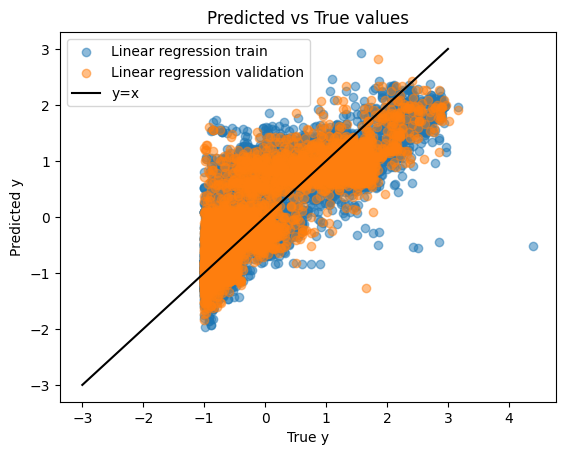

In [82]:
# now we do the same with ridge regression
ridge_model = Ridge(alpha=1.0, fit_intercept=True)
ridge_model.fit(X_train, y_train)
y_train_pred_ridge = ridge_model.predict(X_train)
y_val_pred_ridge = ridge_model.predict(X_validation)
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
mse_val_ridge = mean_squared_error(y_validation, y_val_pred_ridge)
print(f"Ridge regression model, alpha=1.0, MSE train: {mse_train_ridge:.3f}, MSE validation: {mse_val_ridge:.3f}")

plt.figure()
plt.scatter(y_train, y_train_pred, label="Linear regression train", alpha=0.5)
plt.scatter(y_validation, y_val_pred, label="Linear regression validation", alpha=0.5)
# plt.scatter(y_train, y_train_pred_ridge, label="Ridge regression train", alpha=0.5)
# plt.scatter(y_validation, y_val_pred_ridge, label="Ridge regression validation", alpha=0.5)
plt.plot([-3, 3], [-3, 3], color="black", label="y=x")
plt.xlabel("True y")
plt.ylabel("Predicted y")
plt.legend()
plt.title("Predicted vs True values")
plt.show()

**Question 2.4**  We now consider having a only a smaller subset of the same dataset available, with only `n=400` training datapoints. We want to understand if in this case, regularization as seen in the lecture can help us to obtain a better model.

We consider Ridge regression with the regularization parameter $\lambda$, where the matrix that we want to invert is not $X^TX$ directly, but instead $X^TX + \lambda I$.

a) Replace the linear regression from 2.3b) with the Ridge regression class from the sklearn library and use  $\lambda\in\{10,1\}$. Compute the training and validation error for each. Which of the two $\lambda$'s would you use?

*Hint:* Check the documentation of the [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) class to understand how you set $\lambda$.

In [83]:
n = 400 

ridge_regression_sk = Ridge(alpha=10.0, fit_intercept=True)
ridge_regression_sk.fit(X_train[:n], y_train[:n])

y_train_pred = ridge_regression_sk.predict(X_train[:n])
mse_train = mean_squared_error(y_train[:n], y_train_pred)

y_validation_pred = ridge_regression_sk.predict(X_validation)
mse_val = mean_squared_error(y_validation, y_validation_pred)

print(f"For lambda=10: MSE [train={mse_train}], MSE [val={mse_val}].")

ridge_regression_sk = Ridge(alpha=1.0, fit_intercept=True)
ridge_regression_sk.fit(X_train[:n], y_train[:n])
y_train_pred = ridge_regression_sk.predict(X_train[:n])
mse_train = mean_squared_error(y_train[:n], y_train_pred)
y_validation_pred = ridge_regression_sk.predict(X_validation)   
mse_val = mean_squared_error(y_validation, y_validation_pred)

print(f"For lambda=1: MSE [train={mse_train}], MSE [val={mse_val}].")

For lambda=10: MSE [train=0.24482911007717786], MSE [val=0.3357044440647017].
For lambda=1: MSE [train=0.2187953229297135], MSE [val=0.3344189835237504].


b) Repeat this experiment for several lambdas, `lmbdas = np.logspace(2,-5,50)`, and record the associated training and validation errors in a list.

In [84]:
train_errors = []
validation_errors = []
lmbdas = np.logspace(2,-5,50)

for lmnda in lmbdas :
    ridge_regression_sk = Ridge(alpha=lmnda, fit_intercept=True)
    ridge_regression_sk.fit(X_train[:n], y_train[:n])
    y_train_pred = ridge_regression_sk.predict(X_train[:n])
    train_errors.append(mean_squared_error(y_train[:n], y_train_pred))
    y_validation_pred = ridge_regression_sk.predict(X_validation)   
    validation_errors.append(mean_squared_error(y_validation, y_validation_pred))

c) Plot the train and validation error over the lambdas to observe that there is a minimum of the validation error in terms of lambda. Identify the best lambda for this model, and mark it on the same plot.

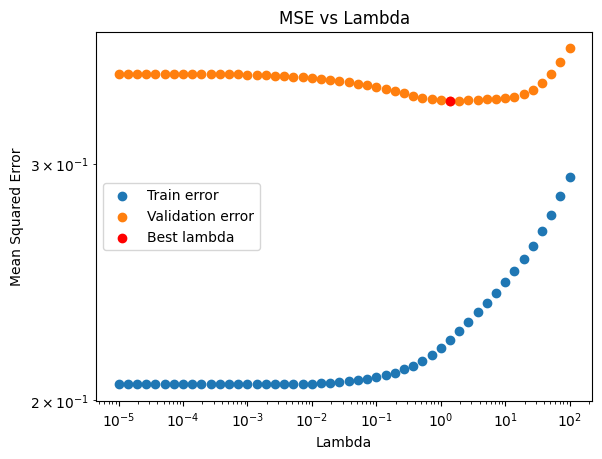

In [85]:
best_lmbda_idx = np.argmin(validation_errors)
best_lmbda =   lmbdas[best_lmbda_idx]

# plot the result
plt.figure()
plt.scatter(lmbdas, train_errors, label="Train error")
plt.scatter(lmbdas, validation_errors, label="Validation error")
plt.scatter(best_lmbda, validation_errors[best_lmbda_idx], color="red", label="Best lambda")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Lambda")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Lambda")
plt.legend()
plt.show()

d) Print the generalization error of the model you selected. Which dataset do you need to use to estimate it and why?

In [86]:
print(f"The best lambda is {best_lmbda}, with a validation error of {validation_errors[best_lmbda_idx]}.")

The best lambda is 1.3894954943731381, with a validation error of 0.3341705429886461.


Tu dois estimer l’erreur de généralisation sur le jeu de test (held-out) — celui qui n’a pas servi ni à l’entraînement ni à la validation / sélection d’hyper-paramètres.

**Question 2.5** We now want to understand more broadly how the number of samples and the selection of the best $\lambda$ relate to one another.

a) For the different values of $\lambda \in \{10000,100,1,0.0001\}$. Plot the train and validation error over the different `n` from `trainset_sizes`, with a logscale on the x-axis.
Is there one lambda which is optimal for all `n`?

*Tip:* If you running the code takes too long, change the `100` in `np.logspace(0.5,5,100).astype(int)` to a smaller integer, then you will have less resolution on the x-axis, but you can debug your code faster.

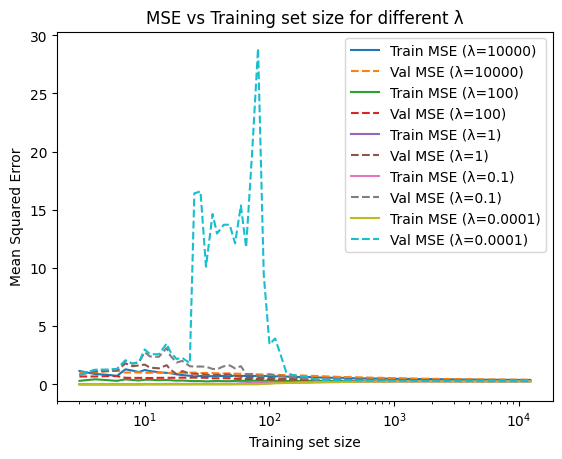

In [87]:
trainset_sizes = np.logspace(0.5, 5, 100).astype(int)
lmbdas = [10000, 100, 1, 0.1, 0.0001]

plt.figure()

for lmbda in lmbdas:
    mse_train_list = []
    mse_val_list = []
    sizes_used = []

    for n in trainset_sizes:
        if n > X_train.shape[0]:
            continue
        ridge_regression_sk = Ridge(alpha=lmbda, fit_intercept=True)
        ridge_regression_sk.fit(X_train[:n], y_train[:n])

        # train error
        y_train_pred = ridge_regression_sk.predict(X_train[:n])
        mse_train = mean_squared_error(y_train[:n], y_train_pred)
        mse_train_list.append(mse_train)

        # validation error
        y_val_pred = ridge_regression_sk.predict(X_validation)
        mse_val = mean_squared_error(y_validation, y_val_pred)
        mse_val_list.append(mse_val)

        sizes_used.append(n)

    # tracer les deux courbes pour ce lambda
    plt.plot(sizes_used, mse_train_list, label=f"Train MSE (λ={lmbda})")
    plt.plot(sizes_used, mse_val_list, "--", label=f"Val MSE (λ={lmbda})")

plt.xscale("log")
plt.xlabel("Training set size")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Training set size for different λ")
plt.legend()
plt.show()

b) For every dataset size `n` find the optimal $\lambda$ out of the `lmbdas` array that has the best validation error. 
Create two plots, with the x-axis always in log-scale:
- Plot the best models training and validation error over for every `n`, where `n` is the x-axis. 
- Plot the optimal $\lambda$ over `n` as the x-axis.
What do you observe for the optimal $\lambda$ as a function of $n$?

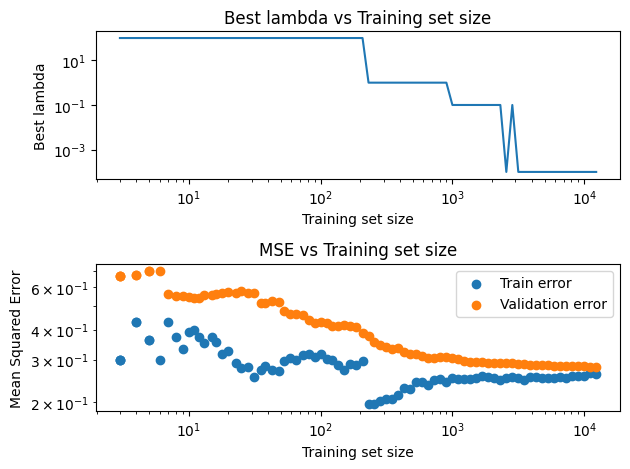

In [88]:
# Finally, we evaluate the best model on the test set
train_errors = []
validation_errors = []
best_lmbdas = []

for n in trainset_sizes:
    if n > X_train.shape[0]:
        continue
    
    mse_train_list = []
    mse_val_list = []
    
    for lmbda in lmbdas:
        ridge_regression_sk = Ridge(alpha=lmbda, fit_intercept=True)
        ridge_regression_sk.fit(X_train[:n], y_train[:n])
        
        # train error
        y_train_pred = ridge_regression_sk.predict(X_train[:n])
        mse_train = mean_squared_error(y_train[:n], y_train_pred)
        mse_train_list.append(mse_train)
        
        # validation error
        y_val_pred = ridge_regression_sk.predict(X_validation)
        mse_val = mean_squared_error(y_validation, y_val_pred)
        mse_val_list.append(mse_val)

    best_lmbda_idx = np.argmin(mse_val_list)
    best_lmbda =   lmbdas[best_lmbda_idx]
    train_errors.append(mse_train_list[best_lmbda_idx])
    validation_errors.append(mse_val_list[best_lmbda_idx])
    best_lmbdas.append(best_lmbda)

plt.figure()
plt.subplot(2,1,1)
plt.plot(trainset_sizes[:len(best_lmbdas)], best_lmbdas)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Training set size")
plt.ylabel("Best lambda")
plt.title("Best lambda vs Training set size")
plt.subplot(2,1,2)
plt.scatter(trainset_sizes[:len(train_errors)], train_errors, label="Train error")
plt.scatter(trainset_sizes[:len(validation_errors)], validation_errors, label="Validation error")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Training set size")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Training set size")
plt.legend()
plt.tight_layout()
plt.show()

**Question 2.6** We now want to make the predictions better by making the model itself more powerful - the underlying relationships might not be only linear. This is why in this part of the exercise we introduce polynomial regression. (We go back to using the original train/test/val split with the full training set)

a) Implement a function that generates _non-interactive_ polynomial features : for a degree $k$ and an input $x = x_1, ..., x_d$, generate $\tilde x = x_1 / 1!, ..., x_1^k/k!, x_2/1!, ..., x_2^k/k!, ..., x_d^k/k!$.
The factorial ensures that the magnitude of the entries of $\tilde x$ are all of the same order, despite the power to the $k$.

In [89]:
from scipy.special import factorial

def non_interacting_polyfeat(X : np.ndarray, k : int) -> np.ndarray:
    """
    arguments: 
        - X : n x d matrix, where each row is a data sample
        - k : degree of the desired polynomial features
    returns: 
        - X_tilde : n x (dk) matrix containing the polynomial features
    """
    return np.concatenate([X**(i+1)/factorial(i+1) for i in range(k)], axis=1)

b) Then, fit a linear regression (no Ridge yet!) on these polynomial features with different degrees $k$. Plot the training and validation errors over the degree. Explain the phenomenon you observe.

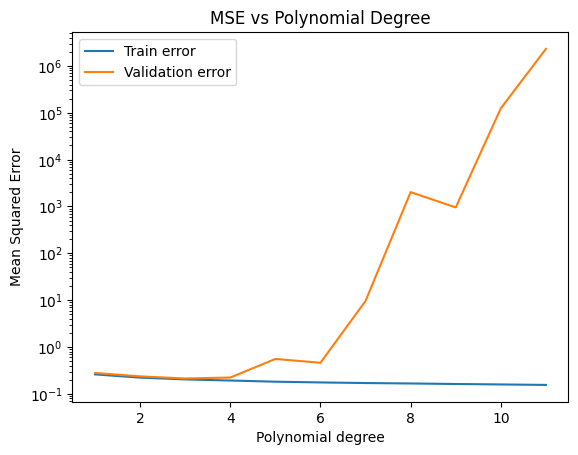

In [90]:
train_errors = []
val_errors = []

degrees = range(1, 12) # use these degrees 

for degree in degrees:
    linear_regression_sk = LinearRegression()

    X_train_poly = non_interacting_polyfeat(X_train, degree)
    linear_regression_sk.fit(X_train_poly, y_train)

    y_train_pred_poly = linear_regression_sk.predict(X_train_poly)
    train_errors.append(mean_squared_error(y_train, y_train_pred_poly))

    y_val_pred_poly = linear_regression_sk.predict(non_interacting_polyfeat(X_validation, degree))
    val_errors.append(mean_squared_error(y_validation, y_val_pred_poly))
    
plt.figure()
plt.plot(degrees, train_errors, label="Train error")
plt.plot(degrees, val_errors, label="Validation error")
plt.yscale("log")
plt.xlabel("Polynomial degree")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Polynomial Degree")
plt.legend()
plt.show()
    # dont forget to always apply the non_interacting_polyfeat before you run the Ridge regression, also for the validation and test sets!

c) Select the best model from the above and compute its validation error, and plot the same $(y,\hat{y})$ as in 2.3d). Is the fit better than the simple linear regression on the full dataset?

In [92]:
best_degree = np.argmin(val_errors) + 1 # +1 because degrees start at 1
print('Best degree is ', best_degree)

X_train_poly = non_interacting_polyfeat(X_train, best_degree)
X_test_poly = non_interacting_polyfeat(X_test, best_degree)
ridge_regression_sk = LinearRegression()
ridge_regression_sk.fit(X_train_poly, y_train)

y_val_pred_poly = linear_regression_sk.predict(non_interacting_polyfeat(X_validation, best_degree))
y_train_pred_poly = linear_regression_sk.predict(non_interacting_polyfeat(X_train, best_degree))
print(f"The training error is {mean_squared_error(y_train, y_train_pred_poly)}.")
print(f"The validation error is {mean_squared_error(y_validation, y_val_pred_poly)}.")

plt.figure()
plt.scatter(y_validation, y_val_pred_poly, alpha=0.5)
plt.plot(np.linspace(np.min(y_validation),np.max(y_validation),100),np.linspace(np.min(y_validation),np.max(y_validation),100),ls="--",c="r", label='diagonal')
plt.xlabel("True y")
plt.ylabel("Predicted y")
plt.title("Predicted vs True values on Test set")
plt.show()

Best degree is  3


ValueError: X has 243 features, but LinearRegression is expecting 891 features as input.

**Question 2.7** 

a) Pick again the best model between the different polynomial degrees and add a different regularisation strength $\lambda$ using the Ridge regression module again. Plot the training and test errors as a function of $\lambda$.

<>:23: SyntaxWarning: invalid escape sequence '\l'
<>:23: SyntaxWarning: invalid escape sequence '\l'
/var/folders/ml/mckm5tb169sckcm9zfghvmm80000gn/T/ipykernel_3610/387960759.py:23: SyntaxWarning: invalid escape sequence '\l'
  plt.axvline(best_lmbda,c='red',linestyle='dashed',label=f'$\lambda=${best_lmbda}')


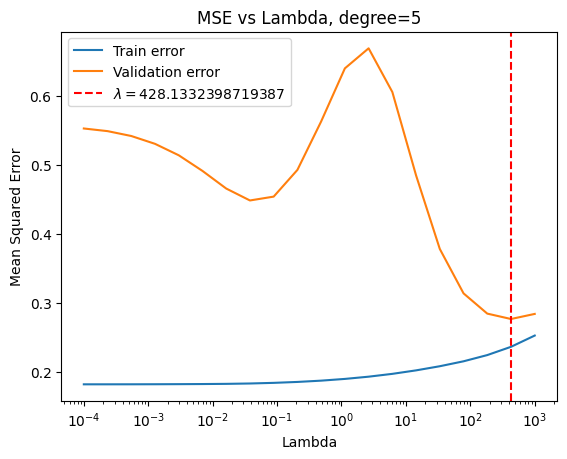

In [93]:
lmbdas = np.logspace(-4, 3, 20) # regularization parameters you are supposed to use
best_degree = 5
X_train_poly = non_interacting_polyfeat(X_train, k=best_degree)
train_errors = []
val_errors_lambda = []

for lmbda in lmbdas:
    ridge_regression_sk = Ridge(alpha=lmbda, fit_intercept=True)
    ridge_regression_sk.fit(X_train_poly, y_train)
    y_train_pred = ridge_regression_sk.predict(X_train_poly)
    mse_train = mean_squared_error(y_train, y_train_pred)
    train_errors.append(mse_train)
    X_val_poly = non_interacting_polyfeat(X_validation, k=best_degree)
    y_val_pred = ridge_regression_sk.predict(X_val_poly)
    mse_val = mean_squared_error(y_validation, y_val_pred)
    val_errors_lambda.append(mse_val)

plt.figure()
plt.plot(lmbdas, train_errors, label="Train error")
plt.plot(lmbdas, val_errors_lambda, label="Validation error")
best_lmbda_idx = np.argmin(val_errors_lambda)
best_lmbda = lmbdas[best_lmbda_idx]
plt.axvline(best_lmbda,c='red',linestyle='dashed',label=f'$\lambda=${best_lmbda}')
plt.xscale("log")
plt.xlabel("Lambda")
plt.ylabel("Mean Squared Error")
plt.title(f"MSE vs Lambda, degree={best_degree}")
plt.legend()
plt.show()
    

b) Compute the generalization error of the best ridge regression.

In [53]:
best_lmbda_idx = np.argmin(val_errors_lambda)
best_lmbda = lmbdas[best_lmbda_idx]

print(f"The best lambda is {best_lmbda}, with a validation error of {val_errors_lambda[best_lmbda_idx]}.")

The best lambda is 428.1332398719387, with a validation error of 0.27653187311334343.


c) Your TA tells you they found a model that achieves a test error of 0.15 on the test dataset when they followed the train-validation-test pipeline like you did. 
- Between your model and their model, which would you choose to use in practice? 
- How can you estimate the generalization error of the model you choose? 

Choix en pratique :
En pratique, on choisira le modèle qui donne la plus petite erreur sur le jeu de test (ici celui de ton TA avec une erreur de 0.15), à condition que la comparaison soit honnête :
	•	Même pipeline train/validation/test
	•	Pas de fuite de données
	•	Hyperparamètres choisis uniquement sur validation

Donc → je choisirais le modèle du TA (test error = 0.15) si toutes les conditions ci-dessus sont respectées.

📌 Estimation de l’erreur de généralisation
	•	L’erreur de test est notre meilleure estimation de l’erreur de généralisation, car le jeu de test est indépendant et n’a pas été utilisé pour l’entraînement ni pour le choix des hyperparamètres.
	•	Concrètement, on l’estime comme la moyenne empirique de la perte (MSE, MAE, accuracy, etc.) sur les données du test set :
\hat{\mathcal{E}}{\text{gen}} = \frac{1}{N{\text{test}}} \sum_{i=1}^{N_{\text{test}}} L\big(y_i, f(x_i)\big)
	•	⚠️ Si tu regardes trop souvent ton test set ou si tu l’utilises pour ajuster ton modèle, ton estimation sera biaisée à l’optimisme. Dans ce cas, il faut soit :
	•	un second test set tenu secret,
	•	soit utiliser des méthodes comme la validation croisée imbriquée (nested CV).